#### 240507 no sequential model

In [1]:
import torch
from torch import nn
import torch.nn.utils.prune as prune
import torch.nn.functional as F
import os

In [3]:
dir_name = os.getcwd() + '/TestRun/'
# ===========================================
""" need to change """
test_time = "Test_2024-05-07 16:27:42" 
# ===========================================
folder_path = dir_name + test_time
model_name = 'best_model.pth'

model = torch.load(f'{folder_path}/{model_name}')

In [4]:
model

simpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)

In [5]:
module3 = model.fc3

In [6]:
dict(module3.named_parameters()).keys()

dict_keys(['weight', 'bias'])

In [7]:
list(module3.named_parameters())

[('weight',
  Parameter containing:
  tensor([[-5.5163e-01, -5.2078e-01, -4.4646e-02, -1.8916e-01, -8.0582e-02,
           -9.7374e-02,  2.7533e-02,  1.5437e-01,  8.2636e-03, -1.8464e-01,
           -7.5806e-02, -4.9272e-02, -1.2824e-01, -3.0819e-01,  6.4598e-03,
           -4.2592e-02, -4.7694e-01, -2.6474e-01, -2.0413e-01, -3.4162e-01,
            1.6019e-02,  4.6455e-02, -4.1856e-01, -5.0845e-01,  3.7243e-02,
           -7.9854e-01,  1.6042e-02, -3.5425e-01, -5.9268e-02, -1.6584e-01,
            3.4213e-01, -5.7059e-02, -3.7362e-01,  2.9144e-02, -2.1529e-01,
           -2.7035e-01, -8.5878e-02,  1.6492e-01, -3.4183e-01, -2.9343e-01,
           -3.7803e-01, -3.4608e-02,  1.0363e-01, -1.4115e-01, -4.2193e-01,
            3.4074e-02, -6.0120e-02, -1.3608e-01, -2.2672e-01, -2.3816e-01,
            9.3531e-02,  2.4983e-03, -1.4652e-01, -5.8499e-02, -1.3317e-01,
            1.5295e-01, -2.5230e-01, -4.3120e-01, -5.6895e-03, -1.5867e-01,
           -5.0489e-02, -1.3846e-01, -2.0774e-01,  1

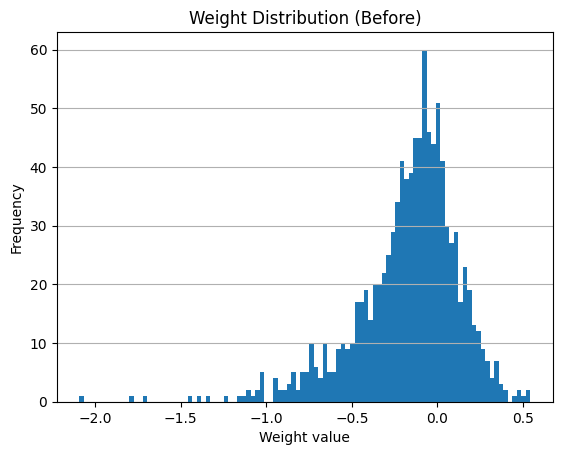

In [8]:
import matplotlib.pyplot as plt

all_weights = []
for name, param in module3.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()

In [9]:
prune.l1_unstructured(module3, name="weight", amount=0.3)

Linear(in_features=100, out_features=10, bias=True)

In [10]:
dict(module3.named_parameters()).keys()

dict_keys(['bias', 'weight_orig'])

In [11]:
print(list(module3.named_buffers()))

[('weight_mask', tensor([[1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
         1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
         0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
         1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
         1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
         1., 1., 1., 1., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
         0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
         1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 

In [12]:
print(module3.weight)

tensor([[-0.5516, -0.5208, -0.0000, -0.1892, -0.0000, -0.0974,  0.0000,  0.1544,
          0.0000, -0.1846, -0.0000, -0.0000, -0.1282, -0.3082,  0.0000, -0.0000,
         -0.4769, -0.2647, -0.2041, -0.3416,  0.0000,  0.0000, -0.4186, -0.5085,
          0.0000, -0.7985,  0.0000, -0.3542, -0.0000, -0.1658,  0.3421, -0.0000,
         -0.3736,  0.0000, -0.2153, -0.2703, -0.0000,  0.1649, -0.3418, -0.2934,
         -0.3780, -0.0000,  0.1036, -0.1411, -0.4219,  0.0000, -0.0000, -0.1361,
         -0.2267, -0.2382,  0.0935,  0.0000, -0.1465, -0.0000, -0.1332,  0.1530,
         -0.2523, -0.4312, -0.0000, -0.1587, -0.0000, -0.1385, -0.2077,  0.1928,
         -0.1749, -0.3068, -0.0000, -0.4531, -0.1957, -0.1733,  0.0000, -0.2054,
          0.2451, -0.2008, -0.5657, -0.1480, -0.0000, -0.0000, -0.1606, -0.1736,
         -0.2861,  0.5435, -0.5585, -0.2927,  0.2259, -0.0000, -0.2483, -0.3209,
         -0.0000, -0.7269, -0.4702,  0.3666,  0.1238,  0.1011,  0.1744, -0.1971,
          0.0000, -0.5034, -

In [13]:
prune.remove(module3, 'weight')

Linear(in_features=100, out_features=10, bias=True)

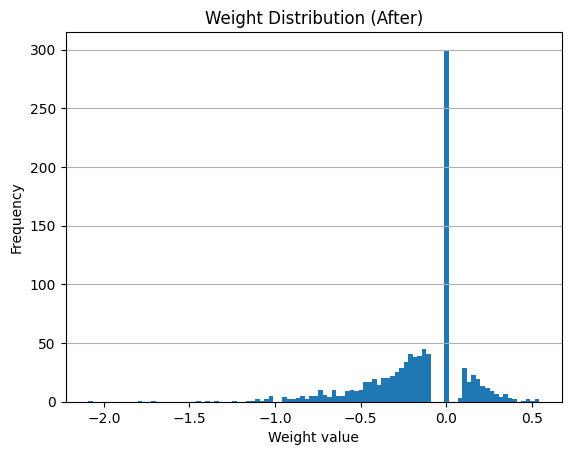

In [14]:
all_weights = []
for name, param in module3.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('Weight Distribution (After)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()

In [15]:
print(
    "Sparsity in fc3.weight: {:.2f}%".format(
        100. * float(torch.sum(model.fc3.weight == 0))
        / float(model.fc3.weight.nelement())
    )
)

Sparsity in fc3.weight: 30.00%


#### global pruning

In [28]:
model = torch.load(f'{folder_path}/{model_name}')

In [29]:
dict(model.named_parameters()).keys()

dict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

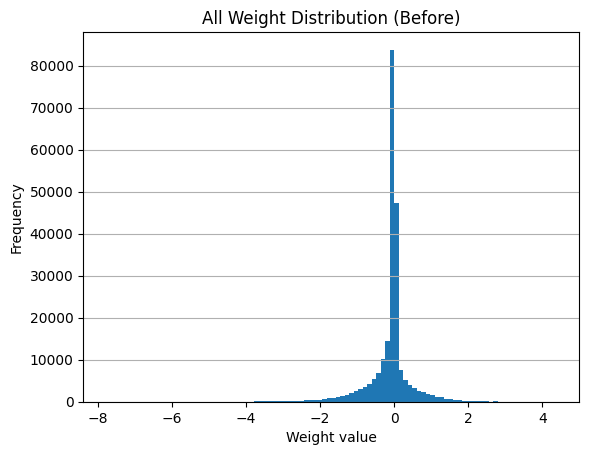

In [30]:
all_weights = []
for name, param in model.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('All Weight Distribution (Before)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()

In [31]:
# global pruning

parameters_to_prune = (
    (model.fc1, 'weight'),
    (model.fc2, 'weight'),
    (model.fc3, 'weight'),
)

prune.global_unstructured(parameters_to_prune, pruning_method=prune.L1Unstructured, amount= 0.3)

In [32]:
dict(model.named_parameters()).keys()

dict_keys(['fc1.bias', 'fc1.weight_orig', 'fc2.bias', 'fc2.weight_orig', 'fc3.bias', 'fc3.weight_orig'])

In [33]:
print("Mask for fc1:", model.fc1.weight_mask)
print("Mask for fc2:", model.fc2.weight_mask)
print("Mask for fc3:", model.fc3.weight_mask)

Mask for fc1: tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 1.],
        ...,
        [0., 1., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Mask for fc2: tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 0., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 1., 1.]])
Mask for fc3: tensor([[1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
         1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
         1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [34]:
list(model.named_modules())

[('',
  simpleMLP(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=100, bias=True)
    (fc3): Linear(in_features=100, out_features=10, bias=True)
  )),
 ('fc1', Linear(in_features=784, out_features=256, bias=True)),
 ('fc2', Linear(in_features=256, out_features=100, bias=True)),
 ('fc3', Linear(in_features=100, out_features=10, bias=True))]

In [35]:
for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        prune.remove(module, 'weight') # fix pruned weights

In [36]:
dict(model.named_parameters()).keys()

dict_keys(['fc1.bias', 'fc1.weight', 'fc2.bias', 'fc2.weight', 'fc3.bias', 'fc3.weight'])

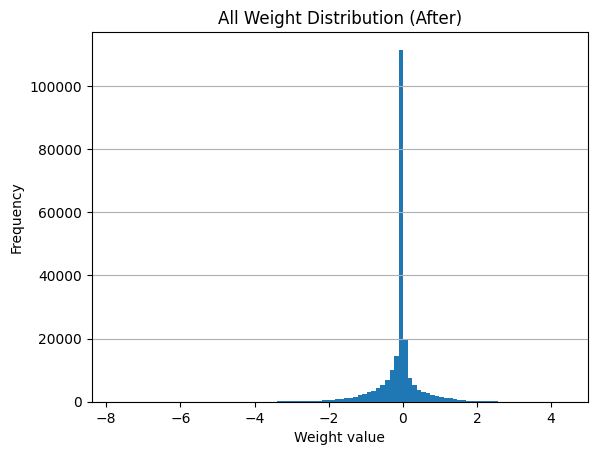

In [37]:
all_weights = []
for name, param in model.named_parameters():
    if 'weight' in name:
        all_weights.extend(param.detach().numpy().flatten())
        
plt.hist(all_weights, bins=100, alpha=1)
plt.title('All Weight Distribution (After)')
plt.xlabel('Weight value')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()